In [1]:
import numpy as np
from scipy.stats import t, expon
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from TruncatedNormal import TruncatedNormal
import matplotlib.pyplot as plt
from sampler_newmodel import *


## Diagnostics of the Sampler

In [13]:
T=261
r=np.load("./data/r copy.npy")
eps_truth=np.load("./data/eps_truth.npy")
print(r.shape)
beta_r=.032712088763023284#0 #0.15 # (0.1263948140321161, .032712088763023284, 6.0, 0.8715676420694289, 0.2913684368439, 0.030264586057052845, 0.008613371294834722, 2.5)
alpha_r=0.1263948140321161
#params= (0.2, 0.21, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
params= (0.1263948140321161, .032712088763023284, 6.0, 0.8715676420694289, 0.2913684368439, 0.030264586057052845, 0.008613371294834722, 2.5)
#sampler=TEST_SAMPLER(T,params,path='./pth/VIScaler_test1_199.pth',debug=True)


(261,)


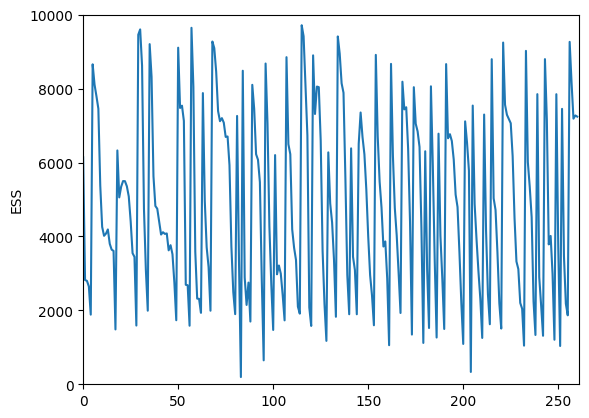

<Figure size 640x480 with 0 Axes>

In [15]:
N=10000
epoch=888
sampler=TEST_SAMPLER(T,params,path=f'./tmppth/VIScaler_test1_{epoch}.pth',debug=True)
samples,weights=sampler.sample(N,r,resample_thre=0.2,checklist=[])
sampler.plot_ESS()

In [57]:
from VI import fine_tune
params_new= (0.1263948140321161, .032712088763023284, 6.0, 0.8715676420694289, 0.2913684368439, 0.030264586057052845, 0.008613371294834722, 2.5)
#params_new= (0.2, 0.2, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
sampler.__init__(T,params_new,path=f'./tmppth/VIScaler_test1_{epoch}.pth',debug=True)
sampler.model=fine_tune(sampler.model,N=16,T=256,params=params_new,num_epochs=30)


Fine Tuning Epoch: 29  Train Loss:1.6596 Total batch:torch.Size([16]) Test Loss:1.6634: 100%|██████████| 30/30 [00:02<00:00, 10.05it/s]


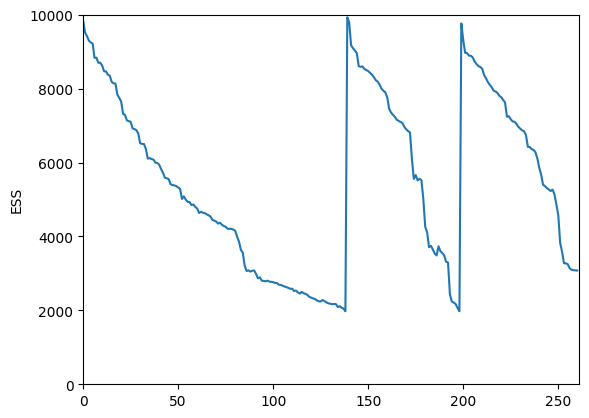

<Figure size 640x480 with 0 Axes>

In [58]:

samples,weights=sampler.sample(N,r,resample_thre=0.2,checklist=[])
sampler.plot_ESS()

### ESS plot

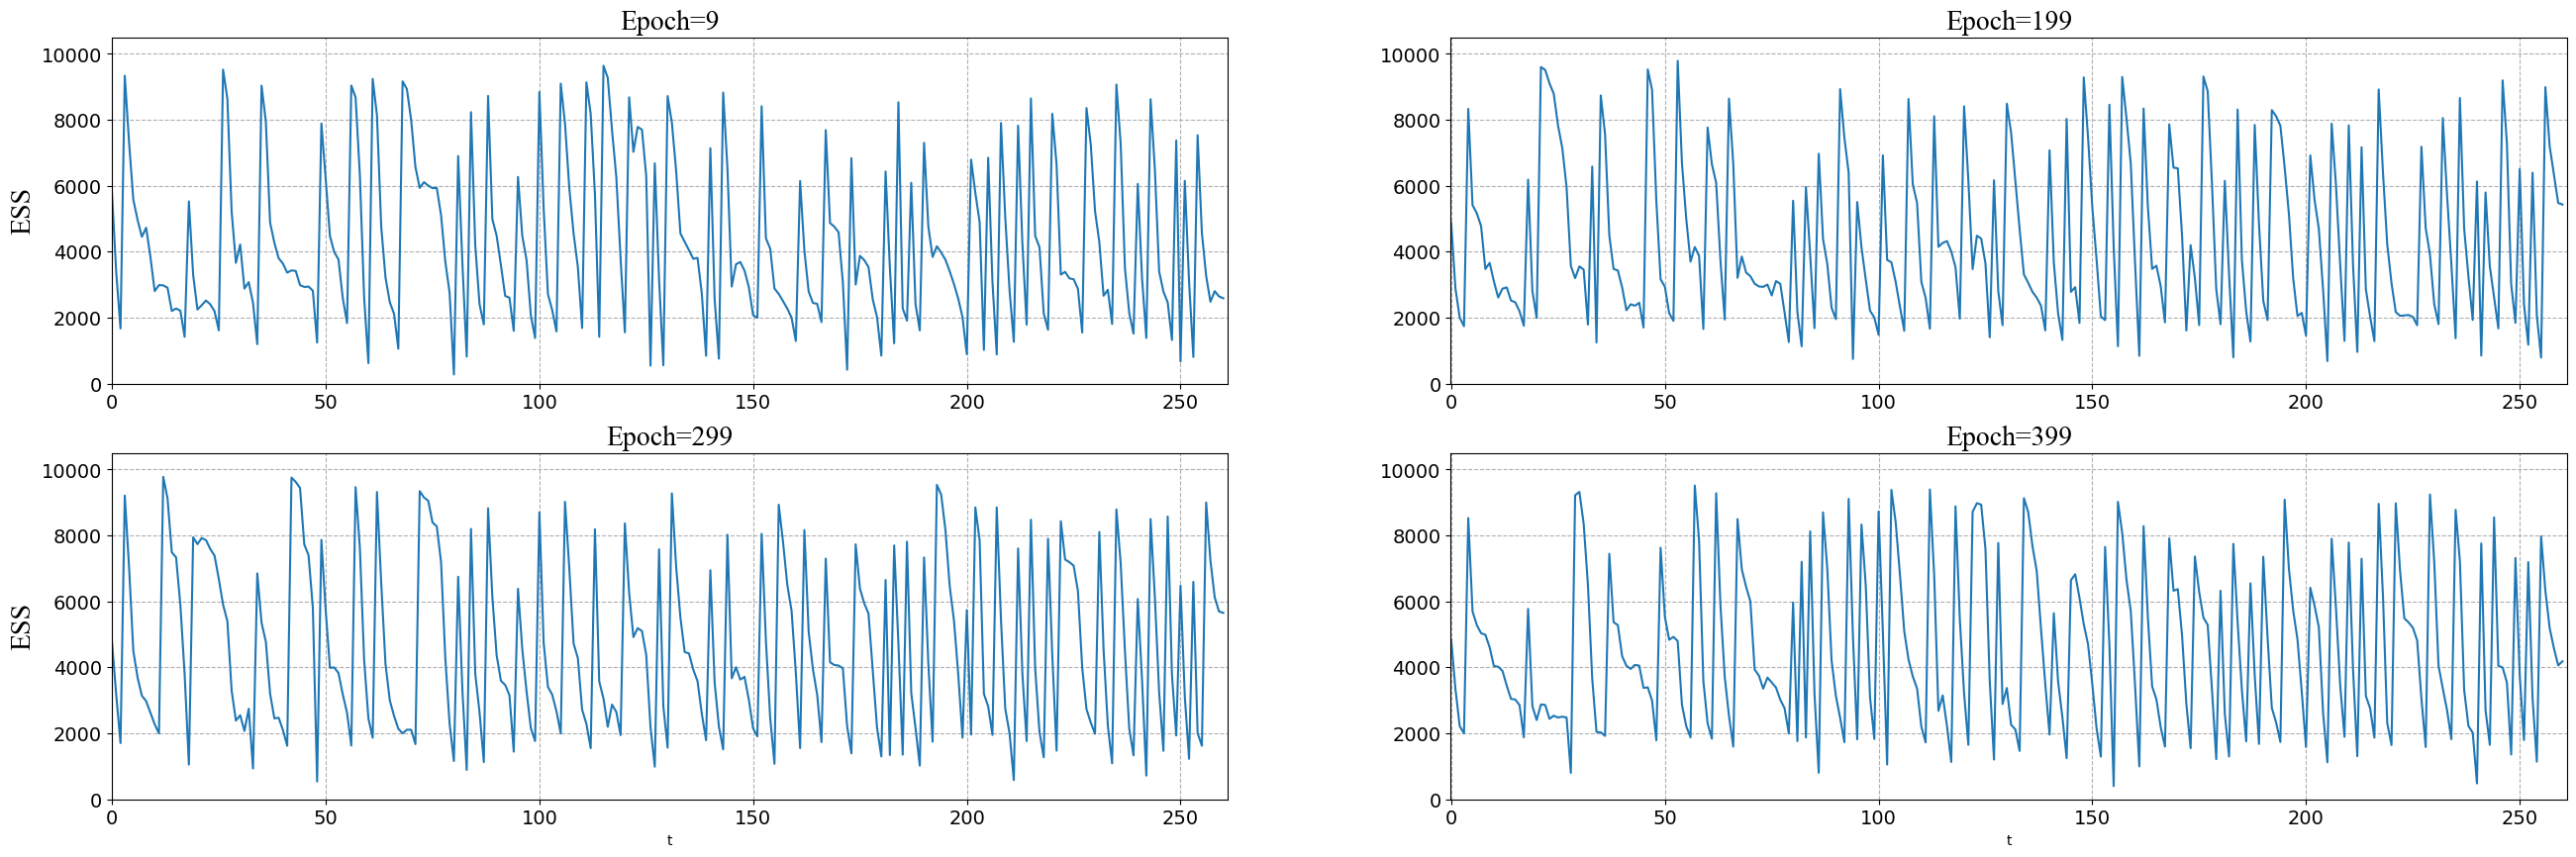

In [23]:

fig, axs = plt.subplots(2, 2, figsize=(32, 10))
timelist=[9, 199, 299, 399]
N=10000
font1={'family' : 'Times New Roman', 'size': 20,"fontstyle":"oblique"}
font2={'family' : 'Times New Roman', 'size': 20}
for i, epoch in enumerate(timelist):
    ax = axs[i // 2, i % 2]

    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    sampler=TEST_SAMPLER(T,params,path=f'./tmppth/VIScaler_test1_{epoch}.pth',debug=True)
    samples,weights=sampler.sample(N,r,resample_thre=0.2,checklist=[])
    ax.set_title(f"Epoch={epoch}",fontdict=font2)
    if i==2 or i ==3:
        ax.set_xlabel("t")
    if i==0 or i==2:
        ax.set_ylabel("ESS",fontdict=font2)
    ax.set_yticks([0,0.2*N,0.4*N,0.6*N,0.8*N,N])
    ax.set_xlim(-0.1,sampler.T)
    ax.set_ylim(0,N+500)
    ax.plot(range(sampler.T),sampler.ESS_list)
    ax.grid(linestyle="--")

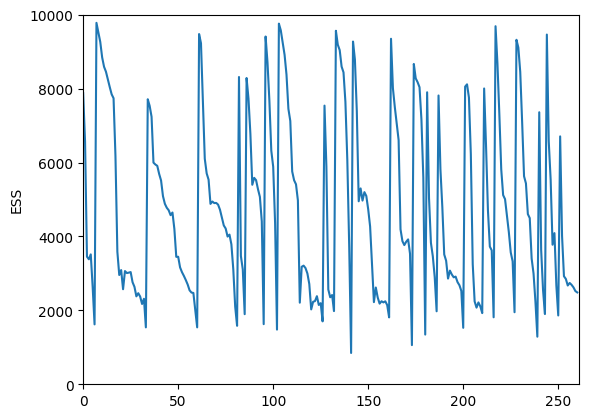

<Figure size 640x480 with 0 Axes>

In [30]:
sampler.plot_ESS()

/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:251: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs=param_to_input(torch.tensor(rr),torch.tensor(eps_past),torch.tensor(r_past),torch.tensor(self.alpha_r),torch.tensor(self.beta_r),
/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.tensor(eps_past).shape[0]==outputs.shape[0]


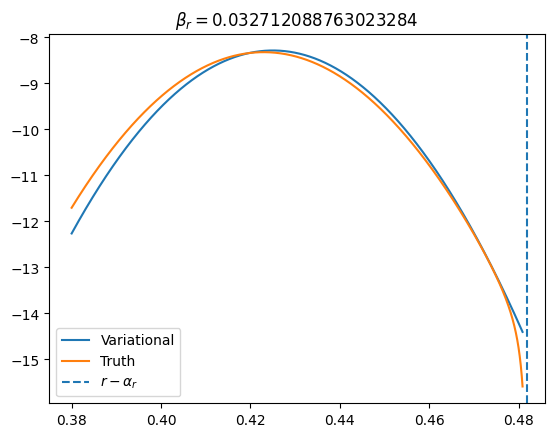

In [25]:
N=10000
r_past=-0.2530992177737233 
r=0.608292365885846
eps=torch.linspace(0.38,r-alpha_r-0.001,N)
eps_past=r_past-alpha_r-1e-2-0.1*torch.ones_like(eps)#torch.rand_like(eps)
log_prob=sampler.log_policy_density(eps=eps,eps_past=eps_past,rr=r,r_past=r_past)
log_prob_truth=sampler.log_likelihood_update(epsilon=eps.detach().numpy(),r=r,epsilon_past=eps_past.detach().numpy(),r_past=r_past)

log_prob=log_prob.detach().numpy()

log_prob-=np.log(np.sum(np.exp(log_prob)))
log_prob_truth-=np.log(np.sum(np.exp(log_prob_truth)))
plt.plot(eps,log_prob,label="Variational")
plt.plot(eps,log_prob_truth,label='Truth')
plt.title(r"$\beta_r=$"+f"{beta_r}")
plt.axvline(x=r-alpha_r,ls="--",label=r"$r-\alpha_r$")
plt.legend()
plt.show()

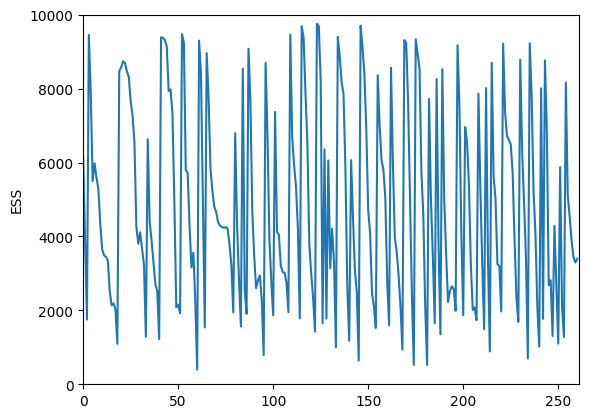

<Figure size 640x480 with 0 Axes>

In [4]:
sampler.plot_ESS()

### Histogram of the last entry

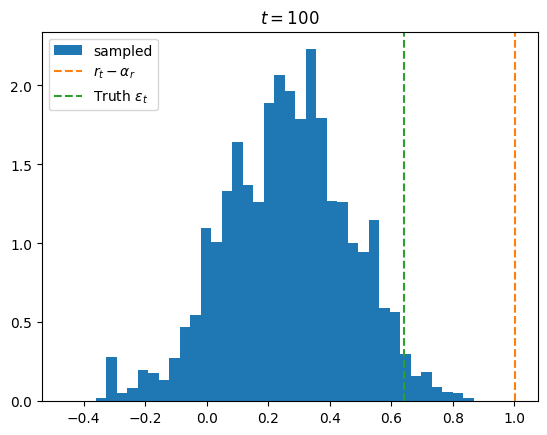

In [150]:
i=99
index = np.random.choice(list(range(len(weights))), p=weights, size=(len(weights)))
plt.hist((samples[:,i])[index], density=True, bins=40, label="sampled")
plt.axvline(x=r[i]-alpha_r,ls="--",c="C1",label=r"$r_t-\alpha_r$")
plt.axvline(x=eps_truth[i],ls="--",c="C2",label=r"Truth $\epsilon_t$")
plt.title(f"$t={i+1}$")
plt.legend()
plt.show()


### Unique values

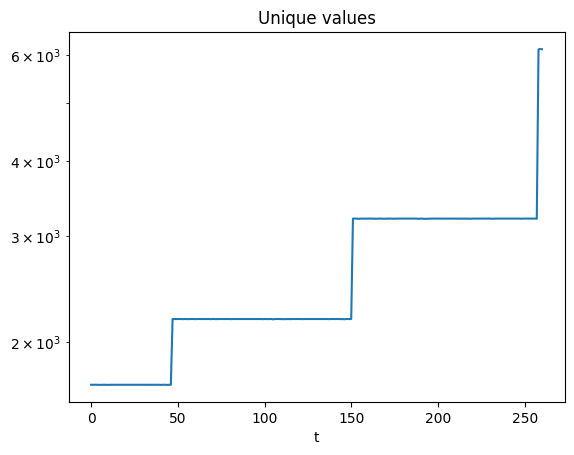

In [151]:
plt.figure()
unique_val=[]
for t in range(T):
    unique_val.append(np.unique(samples[:,t][index]).shape[0])

# plt.show()
#print(unique_val)
plt.plot(unique_val)
plt.title("Unique values")
plt.xlabel("t")
plt.yscale("log")
plt.show()

Check if the variational distribution matches the truth posterior distirbution

/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:251: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs=param_to_input(torch.tensor(rr),torch.tensor(eps_past),torch.tensor(r_past),torch.tensor(self.alpha_r),torch.tensor(self.beta_r),
/Users/hengyuf/Desktop/VSMCG/VSMCG/sampler_newmodel.py:256: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  assert torch.tensor(eps_past).shape[0]==outputs.shape[0]


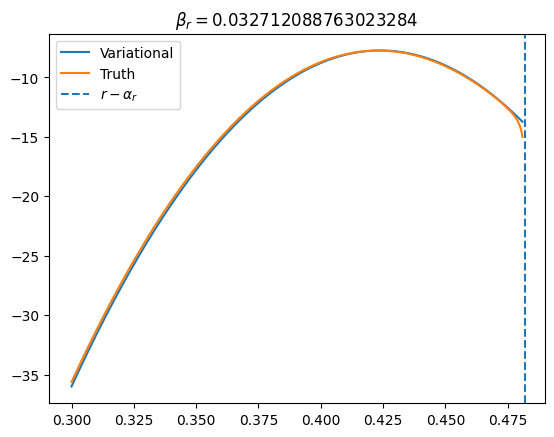

In [6]:

N=10000
r_past=-0.2530992177737233 
r=0.608292365885846
eps=torch.linspace(0.3,r-alpha_r-0.001,N)
eps_past=r_past-alpha_r-1e-2-0.1*torch.ones_like(eps)#torch.rand_like(eps)
log_prob=sampler.log_policy_density(eps=eps,eps_past=eps_past,rr=r,r_past=r_past)
log_prob_truth=sampler.log_likelihood_update(epsilon=eps.detach().numpy(),r=r,epsilon_past=eps_past.detach().numpy(),r_past=r_past)

log_prob=log_prob.detach().numpy()

log_prob-=np.log(np.sum(np.exp(log_prob)))
log_prob_truth-=np.log(np.sum(np.exp(log_prob_truth)))
plt.plot(eps,log_prob,label="Variational")
plt.plot(eps,log_prob_truth,label='Truth')
plt.title(r"$\beta_r=$"+f"{beta_r}")
plt.axvline(x=r-alpha_r,ls="--",label=r"$r-\alpha_r$")
plt.legend()
plt.show()

In [9]:
r-alpha_r

-0.3274623622832955

In [15]:
ra=np.load("ra.npy")
ra/=np.std(ra)
np.save("./data/r.npy",ra)

In [13]:
len(ra)

261